In [38]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

def rhs(yz, t, x_params, r):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    a, b, Km, n = x_params
    x, y, z = yz
    return np.array([a*x**n/(Km+x**n)-b*x, x - y, (x / y - z) / r + z/(5+z)])

# Time points we want for the solution
t = np.linspace(0, 10, 1000)

# Initial condition
xyz_0 = np.array([2.0, 2.0, 1.0])

# Parameters
Fs = [10.0, 4.0, 2.0]
b =  0.5
r = 2

# Keeping Track of the final values:
xs = []
ys = []
zs = []

for F in Fs:
    # Integrate ODES
    x_params = [F, b, 5, 4]
    xyz = integrate.odeint(rhs, xyz_0, t, args=(x_params, r))

    # Pluck out y and z
    x, y, z = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)
    z = np.insert(z, 0, 1.0)
    xs.append(x)
    ys.append(y)
    zs.append(z)
t = np.insert(t, 0, -1.0)

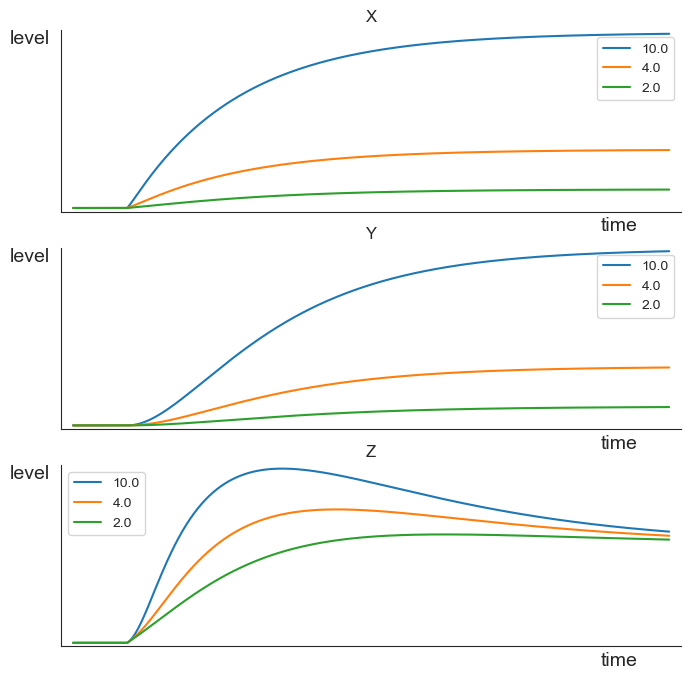

In [39]:
# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
for y in ys:
    ax[1].set_title('Y')
    ax[1].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z in zs:
    ax[2].set_title('Z')
    ax[2].plot(t, z, '-')
for i in range(ax.size):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].set_ylabel('level', rotation=0, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)

In [134]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

def rhs(yz, t, a, b, r1, r2):
    """
    Right hand side of system of ODEs describing I1-FFL.
    """
    x, y, z1, z2= yz
    return np.array([a * x / (1 + x) - b * x, 
                     x - y, 
                     (x / y - z1) / r1 + z1 / (1 + z1) * 2 / (2 + z2), 
                     (x / y - z2) / r2 + z2 / (1 + z2) * 0.5/ (0.5 + z1)])

# Time points we want for the solution
t = np.linspace(0, 100, 1000)

# Initial condition
xyz_0 = np.array([2.0, 1.0, 0.0, 0.0])

# Parameters
Fs = [10.0, 4.0, 1.0]
b =  0.5
r1 = 0.5
r2 = 1.5

# Keeping Track of the final values:
xs = []
ys = []
z1s = []
z2s = []

for F in Fs:
    # Integrate ODES
    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, r1, r2))

    # Pluck out y and z
    x, y, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 0.0)
    z1 = np.insert(z1, 0, 0.0)
    z2 = np.insert(z2, 0, 0.0)
    xs.append(x)
    ys.append(y)
    z1s.append(z1)
    z2s.append(z2)
t = np.insert(t, 0, -1.0)


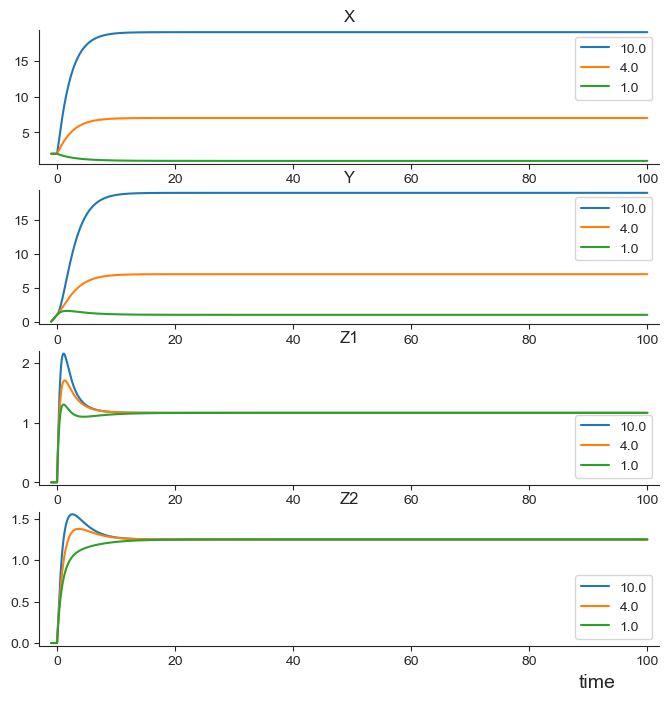

In [133]:
# Generate x
#x = 2.0 + 2.0 * (t > 0.0).astype(dtype=float)
# Plot the results
fig, ax = plt.subplots(4, 1, figsize=(8, 8))
for y in ys:
    ax[1].set_title('Y')
    ax[1].plot(t, y, '-')
for x in xs:
    ax[0].set_title('X')
    ax[0].plot(t, x, '-')
for z1 in z1s:
    ax[2].set_title('Z1')
    ax[2].plot(t, z1, '-')
for z2 in z2s:
    ax[3].set_title('Z2')
    ax[3].plot(t, z2, '-')
for i in range(ax.size):
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])
    ax[i].margins(0.02)
    ax[i].set_xlabel('time', x=.9, fontsize=14)
    ax[i].legend(Fs)
    ax[i].yaxis.set_label_coords(-0.05, 0.9) 
sns.despine(offset=0.1)

Text(0.5, 1.0, 'SS Behavior of I1-FFL')

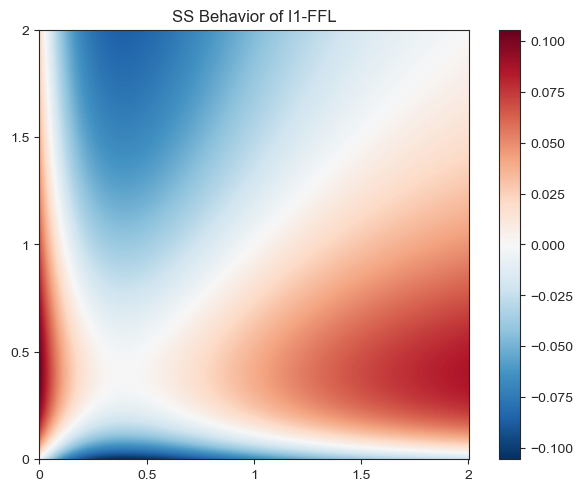

In [131]:
"""
A simplified version of an I1-FFL from Michael Elowitz's Biological Circuit Design Course:
"""
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
sns.set_style('ticks')
%matplotlib inline

r1=np.arange(0.00001,2,100)
r2=np.arange(0.00001,2,100)

def calc(R1,R2):
    # Time points we want for the solution
    t = np.linspace(0, 10, 1000)

    # Initial condition
    xyz_0 = np.array([2.0, 2.0, 1.0, 1.0])

    # Parameters
    Fs = 10.0
    b =  0.5

    # Keeping Track of the final values:
    xs = []
    ys = []
    z1s = []
    z2s = []

    xyz = integrate.odeint(rhs, xyz_0, t, args=(F, b, R1, R2))

    # Pluck out y and z
    x, y, z1, z2 = xyz.transpose()

    # Append the pre-fold change steady state
    x = np.insert(x, 0, 2.0)
    y = np.insert(y, 0, 2.0)
    z1 = np.insert(z1, 0, 1.0)
    z2 = np.insert(z2, 0, 1.0)
    xs.append(x)
    ys.append(y)
    z1s.append(z1)
    z2s.append(z2)
    t = np.insert(t, 0, -1.0)
    return z1s[-1],z2s[-1]

z1x=np.array([])
z2y=np.array([])

for R1 in r1:
    for R2 in r2:
        z1x=np.append(z1x,calc(R1,R2)[0])
        z2y=np.append(z2y,calc(R1,R2)[1])

X, Y = np.meshgrid(z1x,z2y)
Z=(X-Y)
Z[Z<-1] = -1
Z[Z>1] = 1

fig, axs = plt.subplots(1, 1, layout='constrained')
pc = axs.imshow(Z, origin='lower', cmap='RdBu_r')
axs.set_xticks([0, 250, 500, 750, 1000], labels=[0, 0.5, 1, 1.5, 2])
axs.set_yticks([0, 250, 500, 750, 1000], labels=[0, 0.5, 1, 1.5, 2])
fig.colorbar(pc)
axs.set_title('SS Behavior of I1-FFL')
